# SNNGP MNSIT10k

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

with open("important_logs/vary_inducing_random_fcn_mnist10k.log") as f:
    lmls, lbs, ubs, accs, rmses, sigmas = [], [], [], [], [], []
    nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            sigmas.append(sigma)
            
with open("important_logs/vary_inducing_greedy_fcn_mnist10k.log") as f:
    greedy_lmls, greedy_lbs, greedy_ubs, greedy_accs, greedy_rmses, greedy_sigmas = [], [], [], [], [], []
    nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            greedy_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            greedy_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            greedy_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            greedy_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            greedy_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            greedy_sigmas.append(sigma)



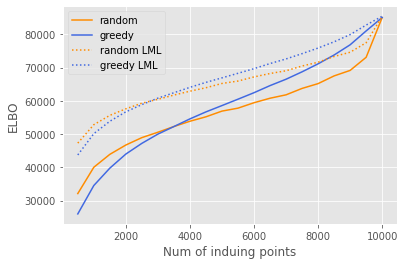

In [2]:
data="mnist10k"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_lbs, label="greedy", color='royalblue')
plt.plot(nums_inducing_points, lmls, label="random LML", linestyle="dotted", color='darkorange')
plt.plot(nums_inducing_points, greedy_lmls, label="greedy LML", linestyle="dotted", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

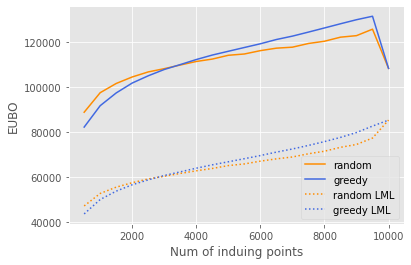

In [3]:
plt.plot(nums_inducing_points, ubs, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_ubs, label="greedy", color='royalblue')
plt.plot(nums_inducing_points, lmls, label="random LML", linestyle="dotted", color='darkorange')
plt.plot(nums_inducing_points, greedy_lmls, label="greedy LML", linestyle="dotted", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

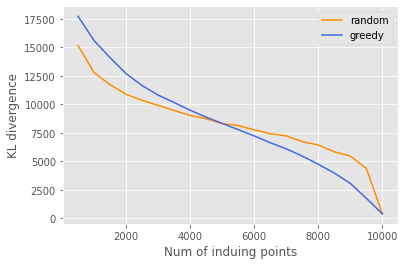

In [4]:
kl = np.array(lmls) - np.array(lbs)
greedy_kl = np.array(greedy_lmls) - np.array(greedy_lbs)
plt.plot(nums_inducing_points, kl, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_kl, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_kl.pdf", bbox_inches='tight')

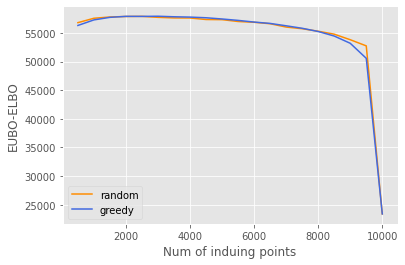

In [5]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="random", color='darkorange')
plt.plot(nums_inducing_points, np.array(greedy_ubs) - np.array(greedy_lbs), label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

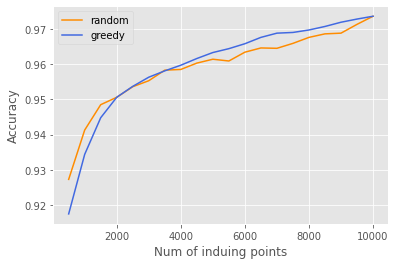

In [6]:
plt.plot(nums_inducing_points, accs, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_accs, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')

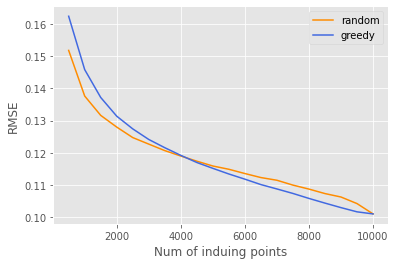

In [7]:
plt.plot(nums_inducing_points, rmses, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_rmses, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("RMSE")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_rmses.pdf", bbox_inches='tight')

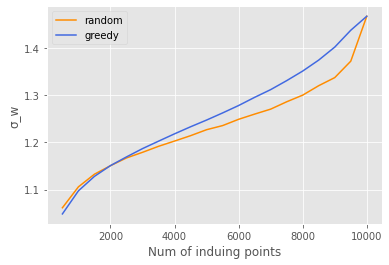

In [8]:
plt.plot(nums_inducing_points, sigmas, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_sigmas, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("\u03C3_w")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_sigmas.pdf", bbox_inches='tight')

# SNNGP MNIST10k + Aug10k

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

with open("important_logs/vary_inducing_random_fcn_mnist10k_aug10k.log") as f:
    augs_lmls, augs_lbs, augs_ubs, augs_accs, augs_rmses, augs_sigmas = [], [], [], [], [], []
    augs_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "num_inducing_points" in line:
            num = int(line.split("num_inducing_points=")[-1].split()[0].strip(','))
            augs_nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            augs_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            augs_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            augs_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            augs_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            augs_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            augs_sigmas.append(sigma)
            
# with open("important_logs/vary_inducing_greedy_fcn_mnist10k.log") as f:
#     greedy_lmls, greedy_lbs, greedy_ubs, greedy_accs, greedy_rmses, greedy_sigmas = [], [], [], [], [], []
#     nums_inducing_points = []
#     for line in f:
#         line = line.strip()
#         if "num_inducing_points" in line:
#             num = int(line.split("num_inducing_points=")[-1].split()[0].strip(','))
#             nums_inducing_points.append(num)
#         elif "LML" in line:
#             lml = float(line.split(": ")[-1].strip())
#             greedy_lmls.append(lml)
#         elif "ELBO" in line:
#             elbo = float(line.split(": ")[-1].strip())
#             greedy_lbs.append(elbo)
#         elif "EUBO" in line:
#             eubo = float(line.split(": ")[-1].strip())
#             greedy_ubs.append(eubo)
#         elif "Accuracy" in line:
#             acc = float(line.split(": ")[-1].strip('%'))/100
#             greedy_accs.append(acc)
#         elif "Loss" in line:
#             rmse = float(line.split(": ")[-1].strip())
#             greedy_rmses.append(rmse)
#         elif "Success" in line:
#             sigma = float(line.split("Result: [")[-1].split(" ")[0])
#             greedy_sigmas.append(sigma)



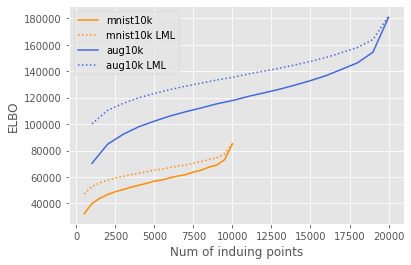

In [10]:
data="mnist10k_aug10k"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="mnist10k", color="darkorange")
plt.plot(nums_inducing_points, lmls, label="mnist10k LML", linestyle="dotted", color="darkorange")
plt.plot(augs_nums_inducing_points, augs_lbs, label="aug10k", color="royalblue")
plt.plot(augs_nums_inducing_points, augs_lmls, label="aug10k LML", linestyle="dotted", color="royalblue")
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

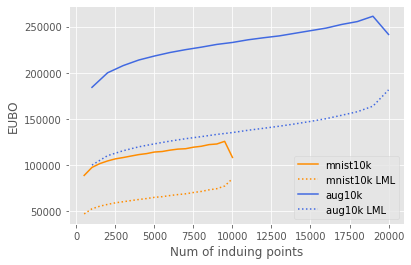

In [11]:
plt.plot(nums_inducing_points, ubs, label="mnist10k", color='darkorange')
plt.plot(nums_inducing_points, lmls, label="mnist10k LML", linestyle="dotted", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_ubs, label="aug10k", color="royalblue")
plt.plot(augs_nums_inducing_points, augs_lmls, label="aug10k LML", linestyle="dotted", color="royalblue")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

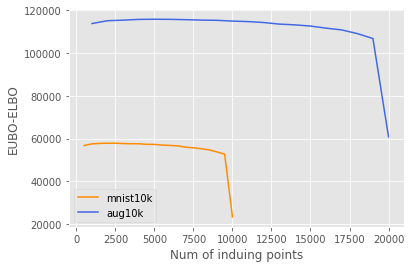

In [12]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="mnist10k", color='darkorange')
plt.plot(augs_nums_inducing_points, np.array(augs_ubs) - np.array(augs_lbs), label="aug10k", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

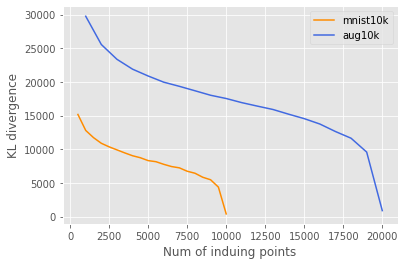

In [13]:
kl = np.array(lmls) - np.array(lbs)
augs_kl = np.array(augs_lmls) - np.array(augs_lbs)
plt.plot(nums_inducing_points, kl, label="mnist10k", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_kl, label="aug10k", color="royalblue")
plt.xlabel("Num of induing points")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_kl.pdf", bbox_inches='tight')

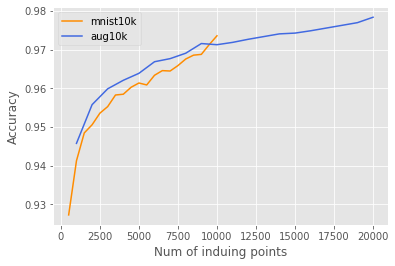

In [14]:
plt.plot(nums_inducing_points, accs, label="mnist10k", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_accs, label="aug10k", color="royalblue")
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')

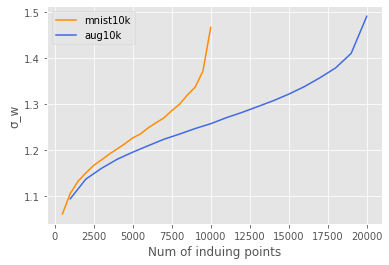

In [15]:
plt.plot(nums_inducing_points, sigmas, label="mnist10k", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_sigmas, label="aug10k", color="royalblue")
plt.xlabel("Num of induing points")
plt.ylabel("\u03C3_w")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_sigmas.pdf", bbox_inches='tight')

# iSNNGP MNIST10k + Aug10k/30/50k

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

with open("important_logs/isnngp_vary_inducing_random_fcn_mnist10k_aug10k.log") as f:
    augs1_lmls, augs1_lbs, augs1_ubs, augs1_accs, augs1_rmses, augs1_sigmas = [], [], [], [], [], []
    augs1_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "num_inducing_points" in line:
            num = int(line.split("num_inducing_points=")[-1].split()[0].strip(','))
            augs1_nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            augs1_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            augs1_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            augs1_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            augs1_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            augs1_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            augs1_sigmas.append(sigma)
            
with open("important_logs/isnngp_vary_inducing_random_fcn_mnist10k_aug30k copy.log") as f:
    augs2_lmls, augs2_lbs, augs2_ubs, augs2_accs, augs2_rmses, augs2_sigmas = [], [], [], [], [], []
    augs2_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "num_inducing_points" in line:
            num = int(line.split("num_inducing_points=")[-1].split()[0].strip(','))
            augs2_nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            augs2_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            augs2_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            augs2_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            augs2_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            augs2_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            augs2_sigmas.append(sigma)
            
with open("important_logs/isnngp_vary_inducing_random_fcn_mnist10k_aug50k.log") as f:
    augs3_lmls, augs3_lbs, augs3_ubs, augs3_accs, augs3_rmses, augs3_sigmas = [], [], [], [], [], []
    augs3_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "num_inducing_points" in line:
            num = int(line.split("num_inducing_points=")[-1].split()[0].strip(','))
            augs3_nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            augs3_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            augs3_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            augs3_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            augs3_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            augs3_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            augs3_sigmas.append(sigma)

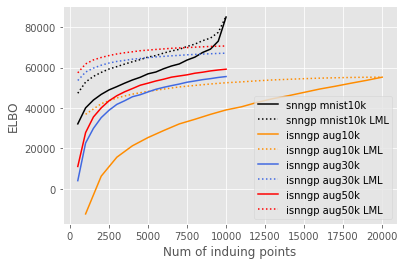

In [33]:
data="mnist10k"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="snngp mnist10k", color="black")
plt.plot(nums_inducing_points, lmls, label="snngp mnist10k LML", linestyle="dotted", color="black")
plt.plot(augs1_nums_inducing_points, augs1_lbs, label="isnngp aug10k", color="darkorange")
plt.plot(augs1_nums_inducing_points, augs1_lmls, label="isnngp aug10k LML", linestyle="dotted", color="darkorange")
plt.plot(augs2_nums_inducing_points, augs2_lbs, label="isnngp aug30k", color="royalblue")
plt.plot(augs2_nums_inducing_points, augs2_lmls, label="isnngp aug30k LML", linestyle="dotted", color="royalblue")
plt.plot(augs3_nums_inducing_points, augs3_lbs, label="isnngp aug50k", color="red")
plt.plot(augs3_nums_inducing_points, augs3_lmls, label="isnngp aug50k LML", linestyle="dotted", color="red")
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

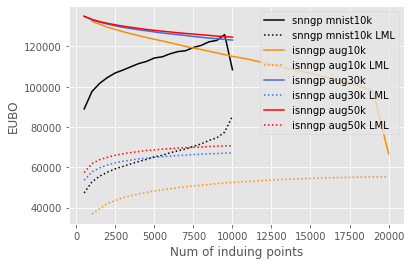

In [34]:
plt.plot(nums_inducing_points, ubs, label="snngp mnist10k", color="black")
plt.plot(nums_inducing_points, lmls, label="snngp mnist10k LML", linestyle="dotted", color="black")
plt.plot(augs1_nums_inducing_points, augs1_ubs, label="isnngp aug10k", color="darkorange")
plt.plot(augs1_nums_inducing_points, augs1_lmls, label="isnngp aug10k LML", linestyle="dotted", color="darkorange")
plt.plot(augs2_nums_inducing_points, augs2_ubs, label="isnngp aug30k", color="royalblue")
plt.plot(augs2_nums_inducing_points, augs2_lmls, label="isnngp aug30k LML", linestyle="dotted", color="royalblue")
plt.plot(augs3_nums_inducing_points, augs3_ubs, label="isnngp aug50k", color="red")
plt.plot(augs3_nums_inducing_points, augs3_lmls, label="isnngp aug50k LML", linestyle="dotted", color="red")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

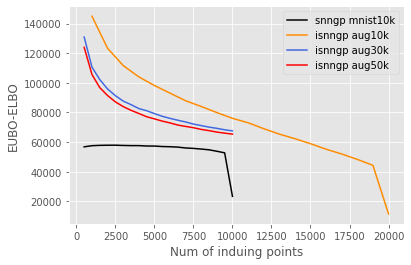

In [35]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="snngp mnist10k", color="black")
plt.plot(augs1_nums_inducing_points, np.array(augs1_ubs) - np.array(augs1_lbs), label="isnngp aug10k", color="darkorange")
plt.plot(augs2_nums_inducing_points, np.array(augs2_ubs) - np.array(augs2_lbs), label="isnngp aug30k", color="royalblue")
plt.plot(augs3_nums_inducing_points, np.array(augs3_ubs) - np.array(augs3_lbs), label="isnngp aug50k", color="red")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

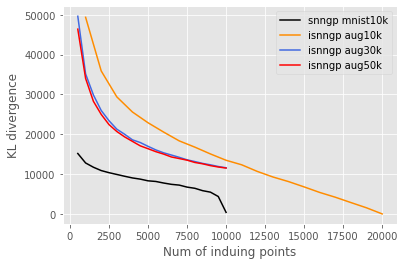

In [36]:
plt.plot(nums_inducing_points, np.array(lmls) - np.array(lbs), label="snngp mnist10k", color="black")
plt.plot(augs1_nums_inducing_points, np.array(augs1_lmls) - np.array(augs1_lbs), label="isnngp aug10k", color="darkorange")
plt.plot(augs2_nums_inducing_points, np.array(augs2_lmls) - np.array(augs2_lbs), label="isnngp aug30k", color="royalblue")
plt.plot(augs3_nums_inducing_points, np.array(augs3_lmls) - np.array(augs3_lbs), label="isnngp aug50k", color="red")
plt.xlabel("Num of induing points")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_kl.pdf", bbox_inches='tight')

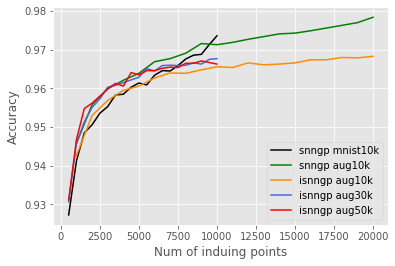

In [37]:
plt.plot(nums_inducing_points, accs, label="snngp mnist10k", color="black")
plt.plot(augs_nums_inducing_points, augs_accs, label="snngp aug10k", color="green")
plt.plot(augs1_nums_inducing_points, augs1_accs, label="isnngp aug10k", color="darkorange")
plt.plot(augs2_nums_inducing_points, augs2_accs, label="isnngp aug30k", color="royalblue")
plt.plot(augs3_nums_inducing_points, augs3_accs, label="isnngp aug50k", color="red")
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')

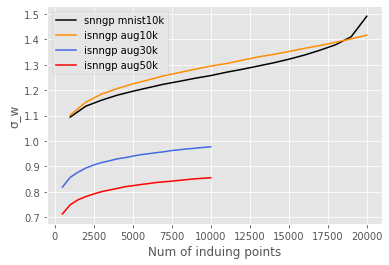

In [38]:
plt.plot(augs_nums_inducing_points, augs_sigmas, label="snngp mnist10k", color="black")
plt.plot(augs1_nums_inducing_points, augs1_sigmas, label="isnngp aug10k", color="darkorange")
plt.plot(augs2_nums_inducing_points, augs2_sigmas, label="isnngp aug30k", color="royalblue")
plt.plot(augs3_nums_inducing_points, augs3_sigmas, label="isnngp aug50k", color="red")
plt.xlabel("Num of induing points")
plt.ylabel("\u03C3_w")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_sigmas.pdf", bbox_inches='tight')

# SNNGP MNIST

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

with open("important_logs/vary_inducing_random_fcn_mnist_20000i.log") as f:
    lmls, lbs, ubs, accs, rmses, sigmas = [], [], [], [], [], []
    nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            nums_inducing_points.append(num)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            rmses.append(rmse)
            
with open("important_logs/vary_inducing_greedy_fcn_mnist_10000i.log") as f:
    greedy_lmls, greedy_lbs, greedy_ubs, greedy_accs, greedy_rmses, greedy_sigmas = [], [], [], [], [], []
    greedy_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            greedy_nums_inducing_points.append(num)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            greedy_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            greedy_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            greedy_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            greedy_rmses.append(rmse)

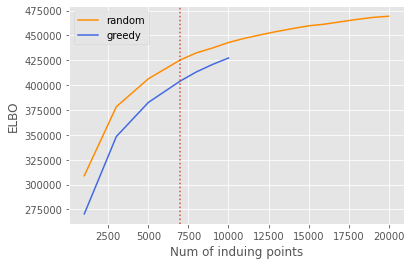

In [39]:
data="mnist"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="random", color='darkorange')
plt.plot(greedy_nums_inducing_points, greedy_lbs, label="greedy", color='royalblue')
# plt.plot(nums_inducing_points, lmls, label="random LML", linestyle="dotted", color='darkorange')
# plt.plot(nums_inducing_points, greedy_lmls, label="greedy LML", linestyle="dotted", color='royalblue')
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

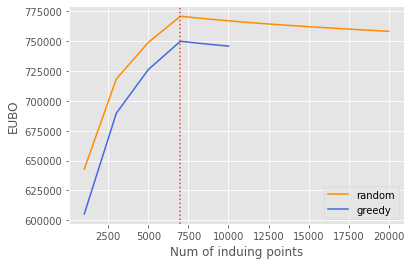

In [40]:
plt.plot(nums_inducing_points, ubs, label="random", color='darkorange')
plt.plot(greedy_nums_inducing_points, greedy_ubs, label="greedy", color='royalblue')
# plt.plot(nums_inducing_points, lmls, label="random LML", linestyle="dotted", color='darkorange')
# plt.plot(nums_inducing_points, greedy_lmls, label="greedy LML", linestyle="dotted", color='royalblue')
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

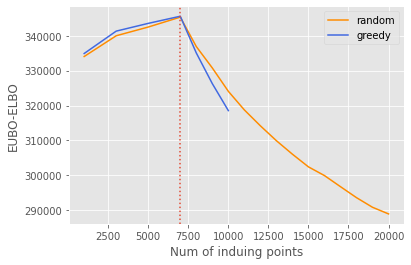

In [41]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="random", color='darkorange')
plt.plot(greedy_nums_inducing_points, np.array(greedy_ubs) - np.array(greedy_lbs), label="greedy", color='royalblue')
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

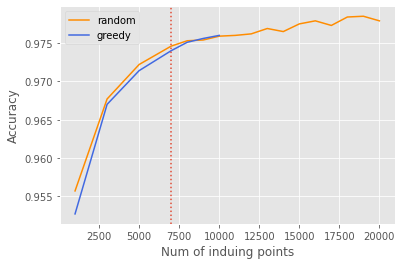

In [42]:
plt.plot(nums_inducing_points, accs, label="random", color='darkorange')
plt.plot(greedy_nums_inducing_points, greedy_accs, label="greedy", color='royalblue')
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')

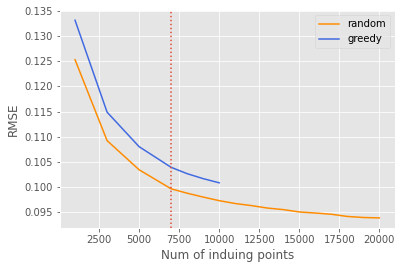

In [43]:
plt.plot(nums_inducing_points, rmses, label="random", color='darkorange')
plt.plot(greedy_nums_inducing_points, greedy_rmses, label="greedy", color='royalblue')
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("RMSE")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_rmses.pdf", bbox_inches='tight')

# SNNGP MNIST + Aug60k

In [44]:
with open("important_logs/vary_inducing_random_fcn_mnist_20000i_aug60k.log") as f:
    augs_lmls, augs_lbs, augs_ubs, augs_accs, augs_rmses, augs_sigmas = [], [], [], [], [], []
    augs_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            augs_nums_inducing_points.append(num)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            augs_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            augs_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            augs_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            augs_rmses.append(rmse)

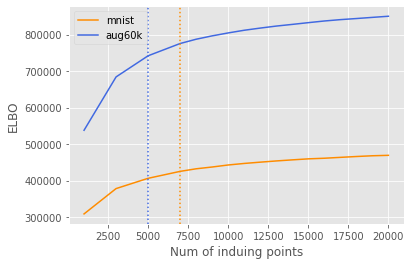

In [47]:
data="mnist_aug60k"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="mnist", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_lbs, label="aug60k", color='royalblue')
plt.axvline(x=7000, color="darkorange", linestyle="dotted")
plt.axvline(x=5000, color="royalblue", linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

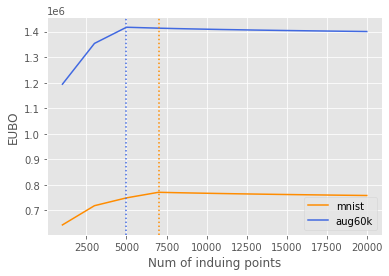

In [48]:
plt.plot(nums_inducing_points, ubs, label="mnist", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_ubs, label="aug60k", color='royalblue')
plt.axvline(x=7000, color="darkorange", linestyle="dotted")
plt.axvline(x=5000, color="royalblue", linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

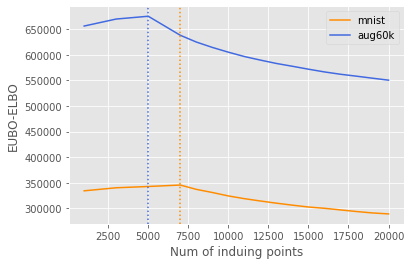

In [49]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="mnist", color='darkorange')
plt.plot(augs_nums_inducing_points, np.array(augs_ubs) - np.array(augs_lbs), label="aug60k", color='royalblue')
plt.axvline(x=7000, color="darkorange", linestyle="dotted")
plt.axvline(x=5000, color="royalblue", linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

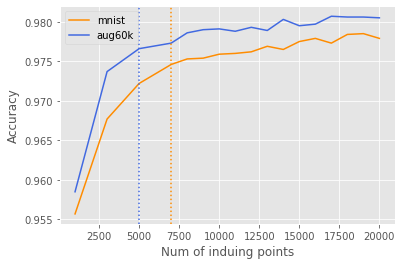

In [50]:
plt.plot(nums_inducing_points, accs, label="mnist", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_accs, label="aug60k", color='royalblue')
plt.axvline(x=7000, color="darkorange", linestyle="dotted")
plt.axvline(x=5000, color="royalblue", linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')

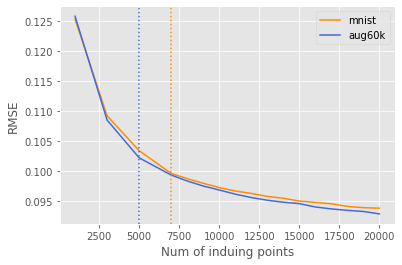

In [51]:
plt.plot(nums_inducing_points, rmses, label="mnist", color='darkorange')
plt.plot(augs_nums_inducing_points, augs_rmses, label="aug60k", color='royalblue')
plt.axvline(x=7000, color="darkorange", linestyle="dotted")
plt.axvline(x=5000, color="royalblue", linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("RMSE")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_rmses.pdf", bbox_inches='tight')

# iSNNGP MNIST + Aug120k

In [52]:
with open("important_logs/isnngp_vary_inducing_random_fcn_mnist_aug120k.log") as f:
    augs1_lmls, augs1_lbs, augs1_ubs, augs1_accs, augs1_rmses, augs1_sigmas = [], [], [], [], [], []
    augs1_nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "num_inducing_points" in line:
            num = int(line.split("num_inducing_points=")[-1].split()[0].strip(','))
            augs1_nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip()) * 10
            augs1_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip()) * 10
            augs1_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip()) * 10
            augs1_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            augs1_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            augs1_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            augs1_sigmas.append(sigma)

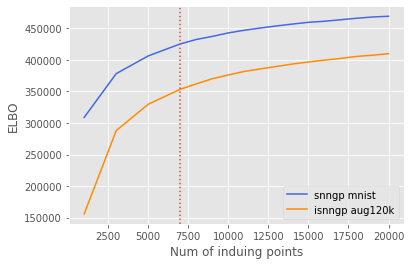

In [53]:
data="mnist"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="snngp mnist", color="royalblue")
plt.plot(augs1_nums_inducing_points, augs1_lbs, label="isnngp aug120k", color="darkorange")
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

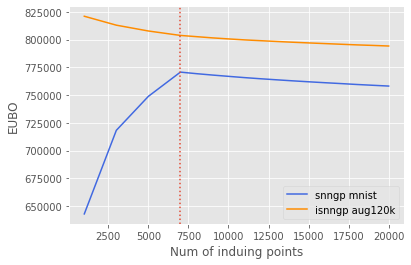

In [54]:
plt.plot(nums_inducing_points, ubs, label="snngp mnist", color="royalblue")
plt.plot(augs1_nums_inducing_points, augs1_ubs, label="isnngp aug120k", color="darkorange")
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

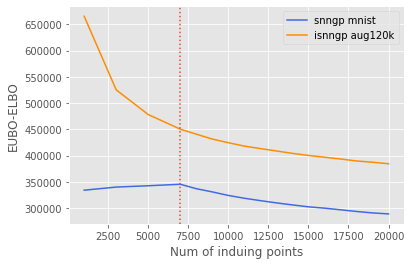

In [55]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="snngp mnist", color="royalblue")
plt.plot(augs1_nums_inducing_points, np.array(augs1_ubs) - np.array(augs1_lbs), label="isnngp aug120k", color="darkorange")
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

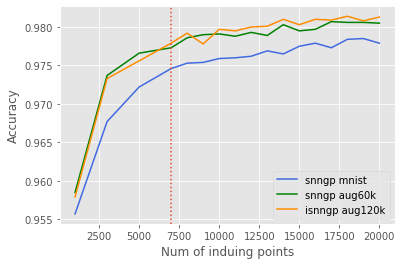

In [59]:
plt.plot(nums_inducing_points, accs, label="snngp mnist", color="royalblue")
plt.plot(augs_nums_inducing_points, augs_accs, label="snngp aug60k", color="green")
plt.plot(augs1_nums_inducing_points, augs1_accs, label="isnngp aug120k", color="darkorange")
plt.axvline(x=7000, linestyle="dotted")
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/isnngp_{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')